<a href="https://colab.research.google.com/github/sarahajbane/colab_workbook_templates/blob/main/sklearn_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Source Information


Original Data Source from Trevor Hastie's LARS software page via Standford University Department of Statistics:
[Diabetes Data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt)

**Brief Description**

From Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) [*Least Angle Regression*](https://https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf), Annals of Statistics (with discussion), 407-499, we have:

"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients and quantitative measure of disease progression one year after baseline"

The included variables are:
* age: Age of the patient
* sex: Sex of the patient
* bmi: Body mass index
* bp: Blood pressure
* s1: Total serum cholesterol (tc)
* s2: Low-density lipoproteins (ldl)
* s3: High-density lipoproteins (hdl)
* s4: tc / hdl (tch)
* s5: Log of serum triglycerides level (ltg)
* s6: Blood sugar level (glu)
* target: measure of disease progression one year after baseline


# EDA for assessment

In [38]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = load_diabetes(as_frame=True, scaled= False) # instructed to set scaled parameter to False
df = data.frame
df.info() # shows columns, counts, non-nulls and types
# alt check null vales:
# print(df.isnull().sum())
# print(df.duplicated().sum()) # check duplicates

In [14]:
#df.describe()
#df.head()

In [ ]:
#print(df['age'].describe())
#print(df['age'].nunique())
#print(df['age'].mode())

In [ ]:
#sns.distplot(df['age']) # Visualise distribution of ages

#sns.histplot(df['age'], kde = True, stat="density", kde_kws=dict(cut=3),
#    alpha=.4, edgecolor=(1, 1, 1, .4)) # alt for same output as distplot deprecated

In [ ]:
df.sex.unique()

In [ ]:
conditions = [
    (df['sex'] == 2),
    (df['sex'] == 1)
]
choices = ['M', 'F']
df['sex'] = np.select(conditions, choices, default='Unknown')

print(df)

In [ ]:
sns.histplot(df['bp'])

# Alternative:
# Histogram of BMI
#plt.hist(df['bmi'], bins=30, color='skyblue', edgecolor='black')
#plt.title('BMI Distribution')
#plt.xlabel('BMI')
#plt.ylabel('Frequency')
#plt.show()

In [ ]:
print(df['bp'].describe())
print('median:', df['bp'].median())

In [ ]:
#print(df.info())

# Additional (non-assessed plots)

In [ ]:
sns.boxplot(data=df, x='sex', y='age')
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

In [ ]:
# Histogram of Age
#plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
#plt.title('Age Distribution')
#plt.xlabel('Age')
#plt.ylabel('Frequency')
#plt.show()


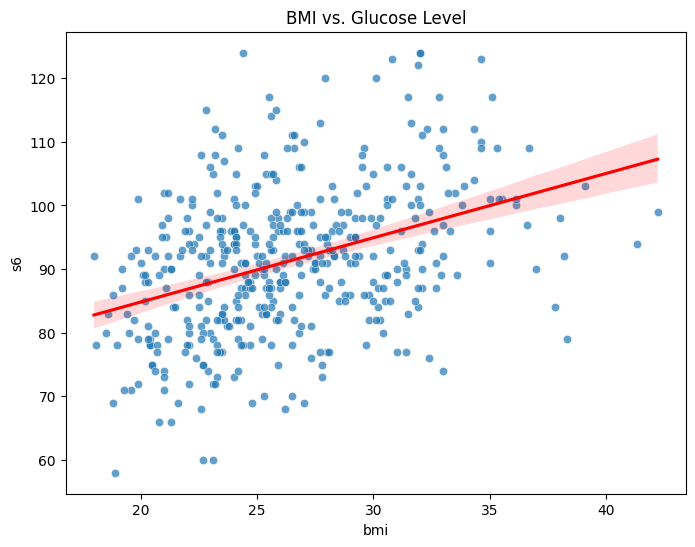

In [45]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['bmi'], df['s6'])

# Scatter plot of BMI vs. Glucose Level
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='s6', alpha=0.7)
plt.title('BMI vs. Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Glucose Level')

# Add regression line
sns.regplot(x='bmi', y='s6', data=df, scatter=False, color='red', label='Regression Line')

# Get plot limits to position annotation dynamically
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

# Annotate with the equation and R^2 value
plt.annotate(
    f"$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_value**2:.2f}$",
    xy=(5,8), xycoords='data',  # 5% from left, 10% from top
)

# Show the plot
plt.show()


In [ ]:
# Pairplot of selected features
sns.pairplot(df[['age', 'bmi', 'bp', 's6', 'sex']], hue='sex')
plt.suptitle('Pairplot of Age, BMI, BP, Glucose Level, and Sex', y=1.0)
plt.show()
